## Iris 데이터를 활용한 SVM 파라미터 실습

### SVM 학습

In [23]:
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [54]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [55]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [34]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [56]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

SVC(kernel='linear')

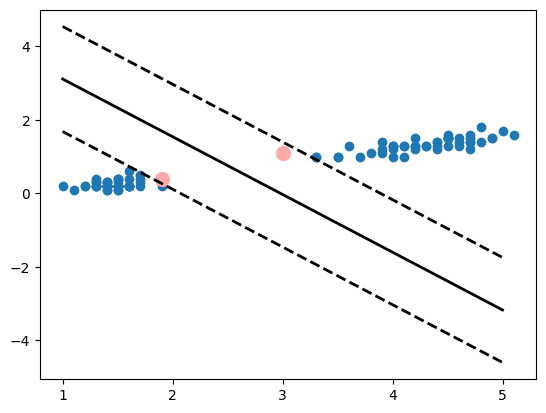

In [57]:
plt.scatter(X[:, 0], X[:, 1])
plot_svc_decision_boundary(svm_clf, 1, 5)

### Outliier 추가

In [58]:
outliers_X = np.array([[3.4, 1.3], [3.2, 0.8]])
outliers_y = np.array([0, 0])

X = np.concatenate([X, outliers_X], axis=0)
y = np.concatenate([y, outliers_y], axis=0)

In [63]:
print(X.shape)
print(y.shape)

(102, 2)
(102,)


In [60]:
svm_clf.fit(X, y)

SVC(kernel='linear')

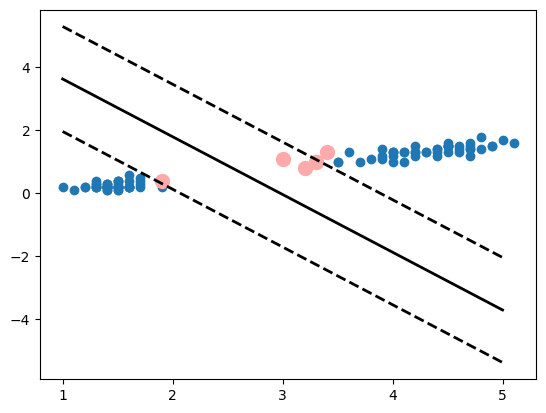

In [64]:
plt.scatter(X[:, 0], X[:, 1])
plot_svc_decision_boundary(svm_clf, 1, 5)

### make_moons를 활용한 비선형 SVM 테스트

In [42]:
from sklearn.datasets import make_moons

In [44]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [45]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [50]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

SVC(kernel='linear')

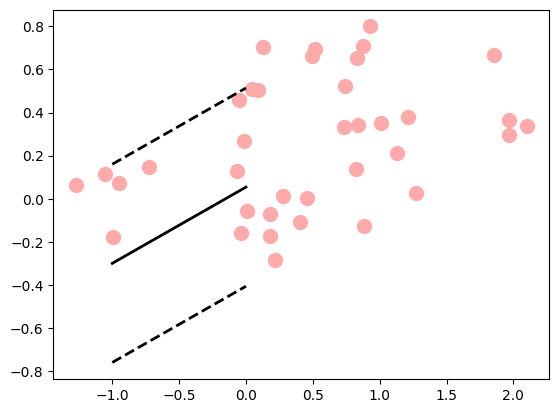

In [51]:
plot_svc_decision_boundary(svm_clf, -1, 0)